In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(r"C:\Users\Elias\Downloads\fcc-forum-pageviews.csv",parse_dates=['date'],index_col='date')

# Clean data
vl_low = df['value'].quantile(0.025)
vl_high =df['value'].quantile(0.975)
df = df[(df['value']>=vl_low)&(df['value']<=vl_high)]



def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots()
    ax.plot(df.index,df['value'])
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')




    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    df_bar = df_bar.groupby(['year','month'])['value'].mean()
    df_bar = df_bar.unstack()

    # Draw bar plot
    fig = df_bar.plot.bar(legend=True,xlabel ='Years',ylabel='Average Page Views').figure
    plt.legend(labels=['January','February','March','April','May','June','July','August','September','October','November','December'],title ='Months') 





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,7))
    sns.boxplot(x='year',y='value',data=df_box,ax=ax1)
    ax1.set_title('Year-Wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    sns.boxplot(x='month',y='value',data=df_box,ax =ax2)
    ax2.set_title('Month-Wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')




    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


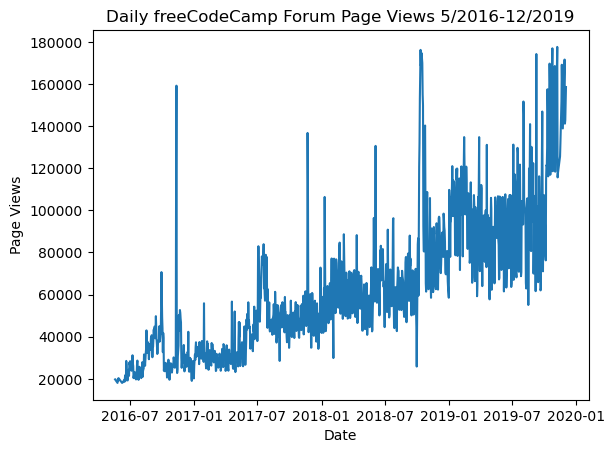

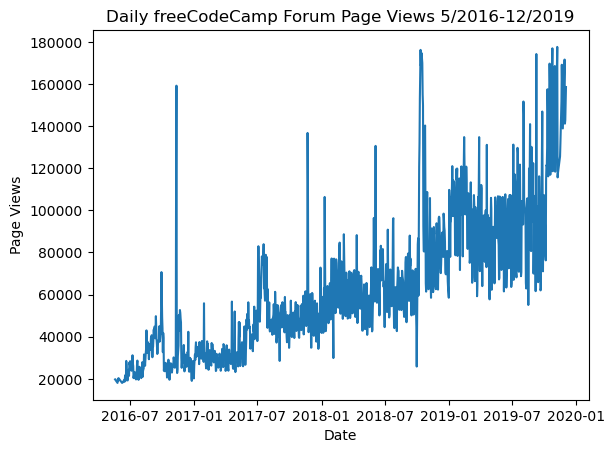

In [12]:
draw_line_plot()


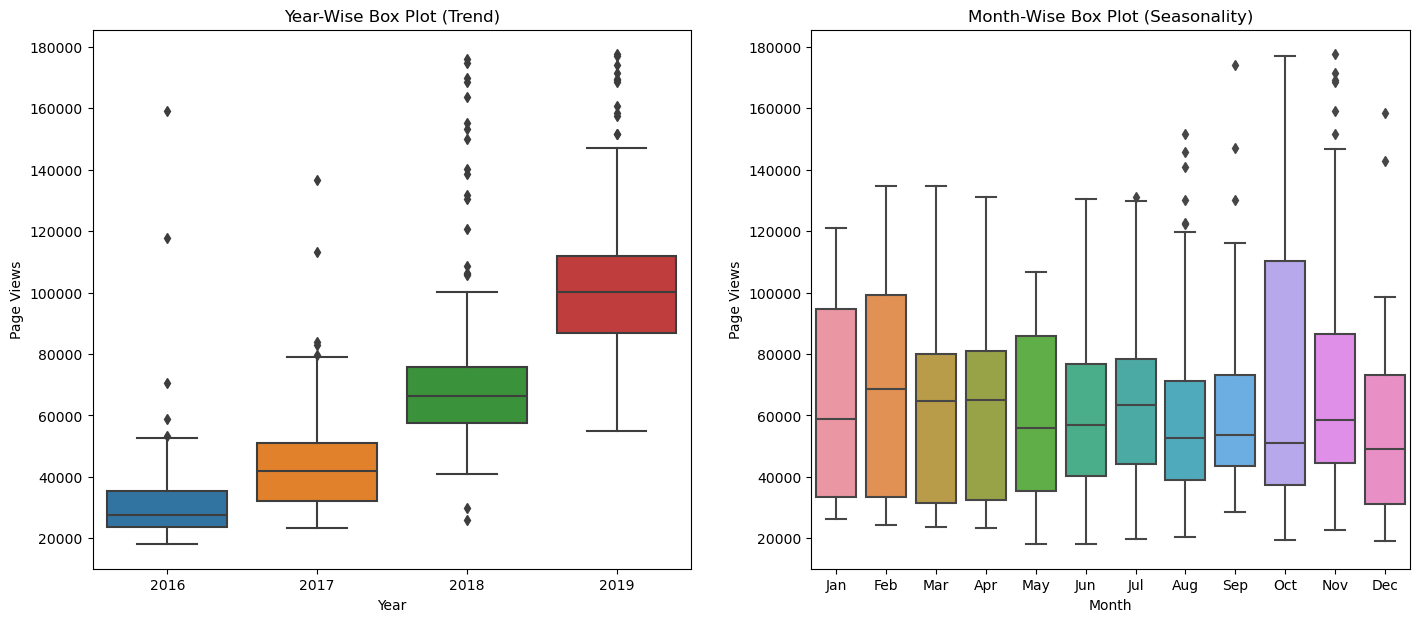

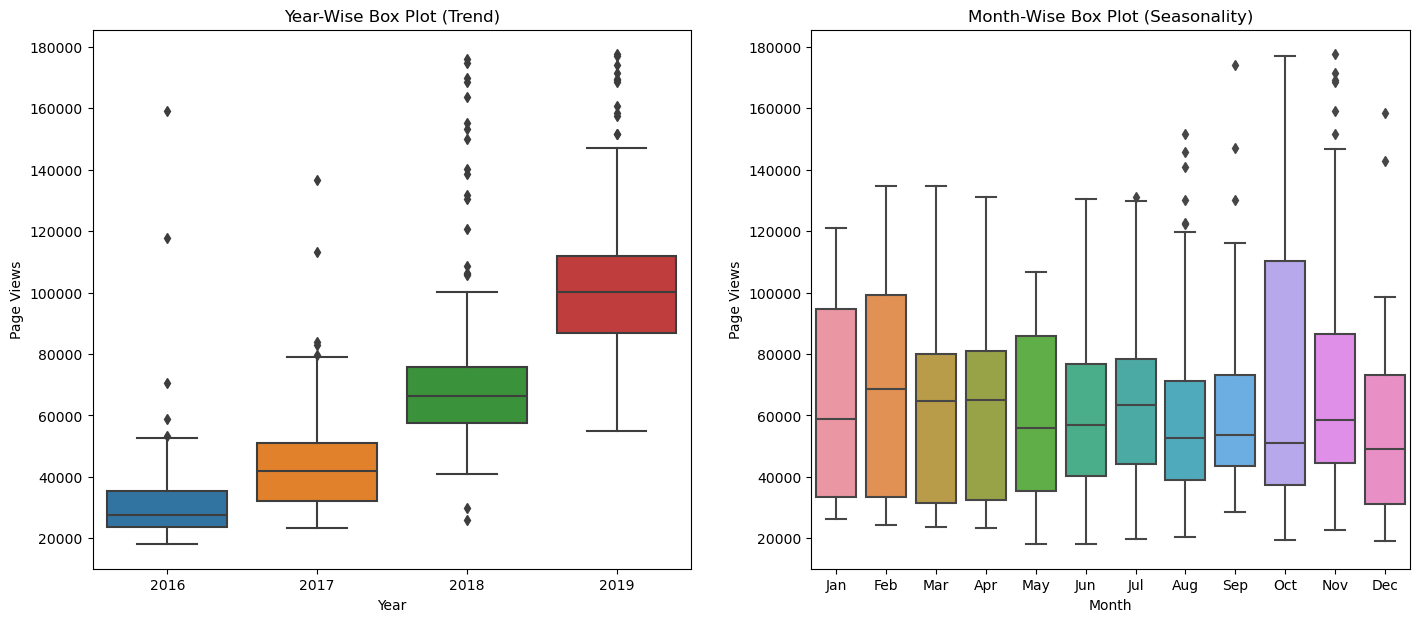

In [13]:
draw_box_plot()

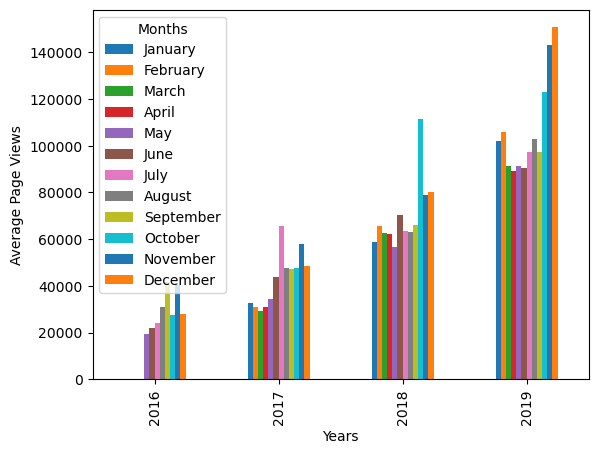

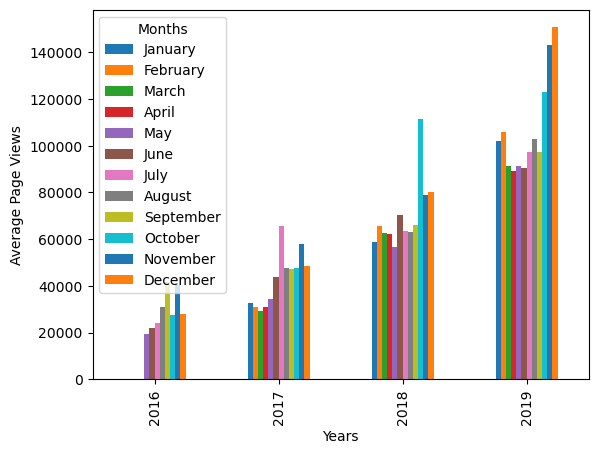

In [14]:
draw_bar_plot()